# Part II - Dataset Explanatory Presentation for Ford GoBike System 
## by Sizwe Zwane

## Dataset Overview

- The dataset, 2017-fordgobike-tripdata.csv, is downloaded from [Ford GoBike](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv) 
and licensed by Ford GoBike. This dataset includes 183 421 trips with 16 features such as locations, time, and user attributes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

params = {
    "font.size": 12,
    "figure.figsize" : (10, 6)
}
plt.rcParams.update(params)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
rides = pd.read_csv('rides_clean.csv', parse_dates=['start_time', 'end_time'])

for col in ['member_gender', 'bike_share_for_all_trip', 'user_type']:
    rides[col] = rides[col].astype('category')

period_cats = ['Morning', 'Afternoon', 'Evening', 'Night']
rides['period_day'] = rides['period_day'].astype(pd.CategoricalDtype(categories=period_cats, ordered=True))

print(rides.info())
rides.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_name       174952 non-null  object        
 3   start_station_latitude   174952 non-null  float64       
 4   start_station_longitude  174952 non-null  float64       
 5   end_station_name         174952 non-null  object        
 6   end_station_latitude     174952 non-null  float64       
 7   end_station_longitude    174952 non-null  float64       
 8   user_type                174952 non-null  category      
 9   member_gender            174952 non-null  category      
 10  bike_share_for_all_trip  174952 non-null  category      
 11  age                      174952 non-null  int64         
 12  duration_min    

,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_gender,bike_share_for_all_trip,age,duration_min,period_day
0,2019-02-28 23:59:18.548,2019-03-01 00:02:47.228,Howard St at Mary St,37.781010,-122.405666,8th St at Ringold St,37.774520,-122.409449,Subscriber,Male,Yes,24,3.47,Night
1,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,Jones St at Post St,37.787327,-122.413278,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,Subscriber,Female,Yes,21,7.63,Night
2,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,Bryant St at 2nd St,37.783172,-122.393572,Subscriber,Male,No,24,8.43,Night
3,2019-02-28 23:56:26.848,2019-03-01 00:03:01.947,Bancroft Way at College Ave,37.869360,-122.254337,Channing Way at Shattuck Ave,37.865847,-122.267443,Subscriber,Male,No,29,6.58,Night
4,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,37.317298,-121.884995,San Jose Diridon Station,37.329732,-121.901782,Subscriber,Female,No,34,19.12,Night
5,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,Subscriber,Male,Yes,43,26.42,Night
6,2019-02-28 23:52:51.164,2019-02-28 23:57:03.976,West St at 40th St,37.830223,-122.270950,Genoa St at 55th St,37.839649,-122.271756,Subscriber,Male,No,42,4.20,Night
7,2019-02-28 23:51:06.014,2019-02-28 23:57:13.312,Bancroft Way at College Ave,37.869360,-122.254337,Telegraph Ave at Carleton St,37.862320,-122.258801,Subscriber,Female,No,20,6.12,Night
8,2019-02-28 23:50:45.698,2019-02-28 23:53:29.569,MLK Jr Way at University Ave,37.871719,-122.273068,Shattuck Ave at Hearst Ave,37.873676,-122.268487,Subscriber,Male,Yes,21,2.72,Night
9,2019-02-28 23:50:41.607,2019-02-28 23:59:49.953,22nd St at Dolores St,37.755000,-122.425728,Broderick St at Oak St,37.773063,-122.439078,Subscriber,Male,No,36,9.13,Night


## 1. Which gender takes the most trips?

- I found that 130000 (74.6%) trips were taken by males, with females having 40000 (23.3%) trips.

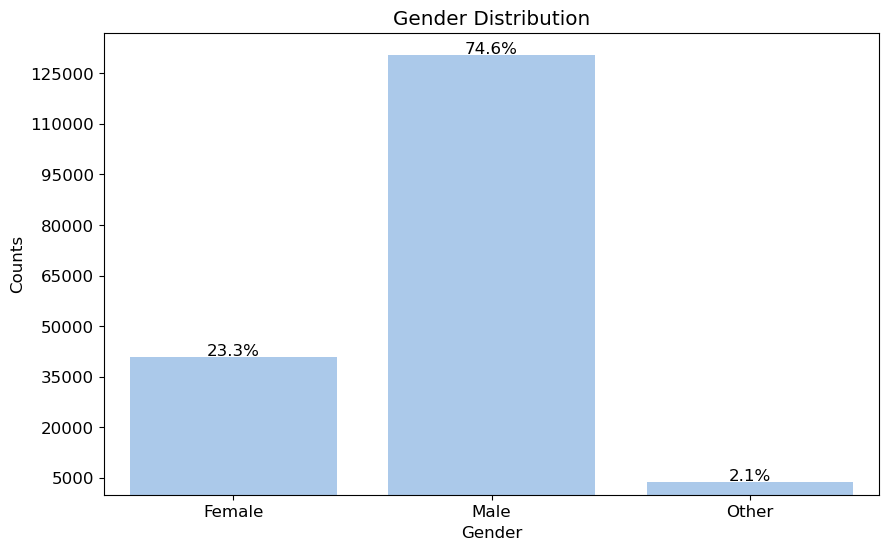

In [3]:
base_color = sns.color_palette('pastel')[0]
def draw_easy_bar(bar_col, ticks, title, xlabel, ylabel):
    fig, ax = plt.subplots()
    sns.countplot(data=rides, x=bar_col, ax= ax, color=base_color)
    ax.set_yticks(ticks, ticks)

    counts = rides[bar_col].value_counts()
    total = counts.sum()
    locs, labels = plt.xticks()
    for loc, label in zip(locs, labels):
        count = counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/total)
        plt.text(loc, count+500, pct_string, ha='center', color='black')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

ticks = np.arange(5000, 140000, 15000)
draw_easy_bar('member_gender', ticks, 'Gender Distribution', 'Gender', 'Counts')

## 2. Which gender takes the longest trips?

- Males have shortest trips with a 11.5 minutes while the females have about 13 minutes trip duration this could be caused by the physical strength between the two genders.

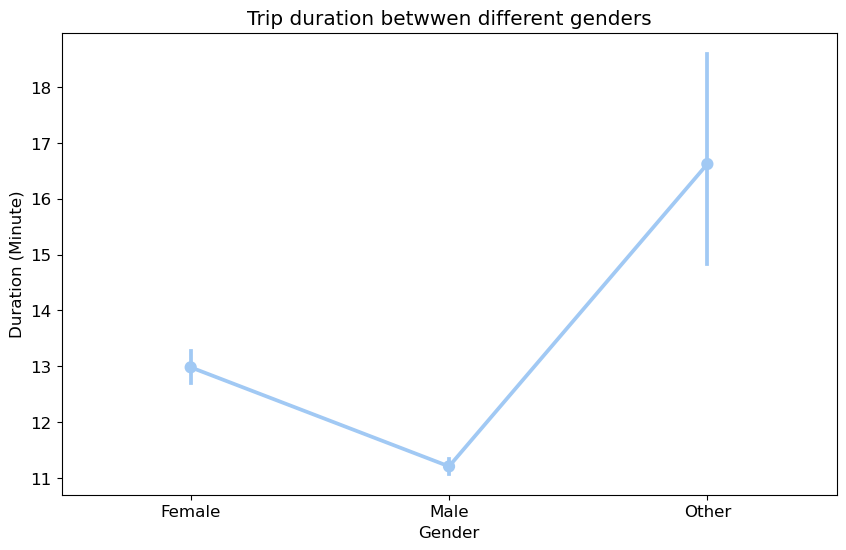

In [4]:
fig, ax = plt.subplots()
sns.pointplot(x='member_gender', ax=ax, data=rides, y='duration_min',color=base_color)
ax.set_title('Trip duration betwwen different genders')
ax.set_xlabel('Gender')
ax.set_ylabel('Duration (Minute)')
plt.show()

## 3. When in a week are most trips taken?

- Most bike trips are taken during the week with Thursday having 33000 (19.3%) trips and Monday having 25000 (14.7%) of the trips.

- Weekends have the lowest number of trips with both Saturday and Sunday having 14000+ trips contributing 8.2% and 8.3% respectively. 

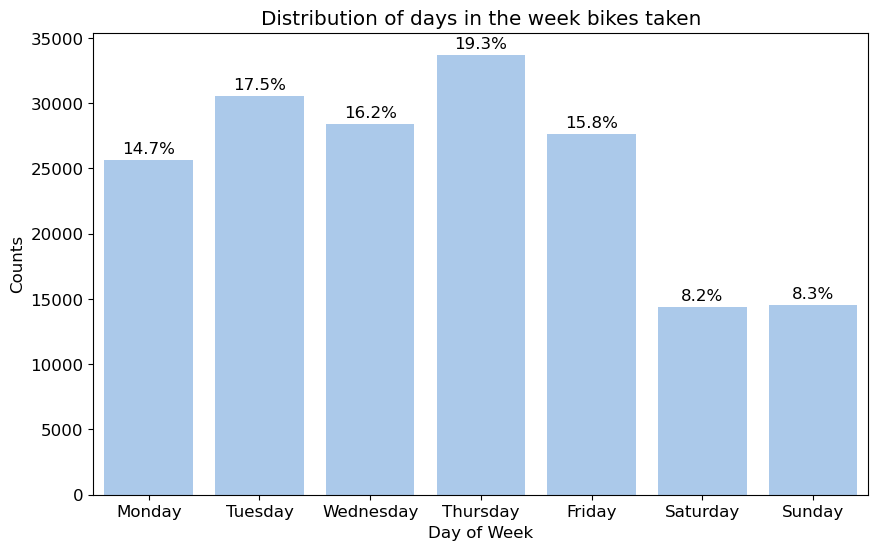

In [5]:
fig, ax = plt.subplots()
week_day = rides.start_time.dt.day_of_week.value_counts()
week_day.sort_index(inplace=True)
sns.barplot(y=week_day, x=week_day.index, ax=ax, color= base_color)
total = week_day.sum()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = week_day[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/total)
    plt.text(loc, count+500, pct_string, ha='center', color='black')

day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticks(week_day.index, day_of_week)
ax.set_title('Distribution of days in the week bikes taken')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Counts')
plt.show()

## 4. What is the trip duration on a weekday for each gender type?

- Males continue to have a lower trip duration ranging at 11 minutes during the week and only shooting up to a 12 minutes average on weekends.

- Females follow with a 13 minutes weekly trip duration average and jumping to 14 minutes average on weekends.

- The anonymous gender group called others average 16 minutes during the week and 22 minutes on weekends.

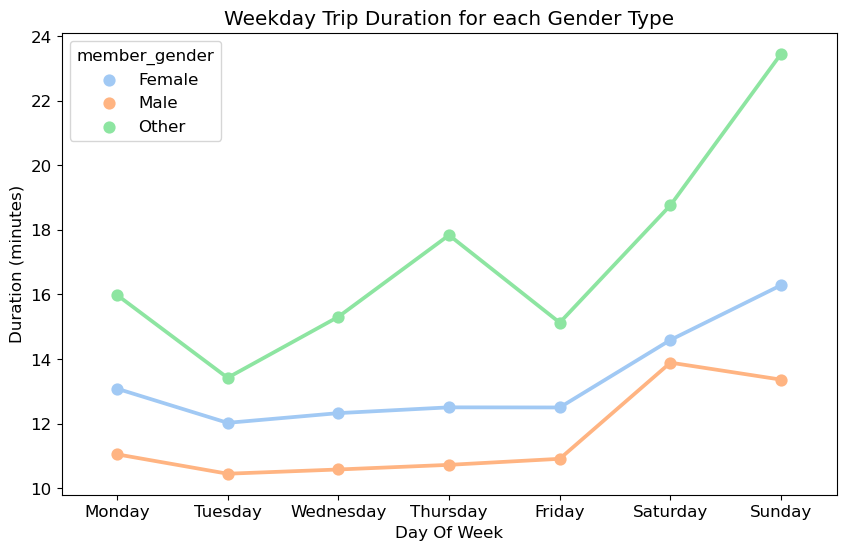

In [6]:
fig, ax = plt.subplots()
sns.pointplot(data = rides, x = rides.start_time.dt.weekday, y = 'duration_min', hue = 'member_gender', palette = 'pastel', ci=None, ax= ax)
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticks(np.arange(0,7),day_of_week)
ax.set_title('Weekday Trip Duration for each Gender Type')
ax.set_ylabel('Duration (minutes)')
ax.set_xlabel('Day Of Week')
plt.show()

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 795459 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\SIZWE\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\SIZWE\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\SIZWE\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\SIZWE\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\SIZWE\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\SIZWE\